In [1]:
pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


In [25]:
import mysql. connector


# Connecting from the server
conn = mysql.connector.connect(user = 'root',
                               host = 'localhost',
                               password = 'Sakshi@05',
                               database = 'Airport')

if conn.is_connected():
    db_Info = conn.get_server_info()
    print("Connected to MySQL version ", db_Info)
    cursor = conn.cursor()
    cursor.execute("select database();")
    record = cursor.fetchone()
    print("You're connected to database:", record)

Connected to MySQL version  8.2.0
You're connected to database: ('airport',)


In [17]:
import mysql. connector

mydb = mysql.connector.connect(
user = 'root',
host = 'localhost',
password = 'Sakshi@05',
database = 'Airport'
)

mycursor = mydb. cursor()

mycursor.execute("select * from airline;")

myresult = mycursor. fetchall()

for x in myresult:
    print(x)

('AA', 'American Airlines', 18002211212)
('AF', 'Air France', 18002211221)
('BA', 'British Airways', 18002211217)
('CA', 'Air China', 18002211220)
('DL', 'Delta Air Lines', 18002211213)
('EK', 'Emirates', 18002211213)
('LH', 'Lufthansa', 18002211222)
('QF', 'Qantas Airways', 18002211223)
('SQ', 'Singapore Airlines', 18002211210)
('TK', 'Turkish Airlines', 18002211224)
('UA', 'United Airlines', 18002211219)
('VI', 'Vistara Airlines', 18002211211)
('XX', 'Air India', 18002211279)


In [21]:
# Creating a cursor object using the connection
cursor = conn.cursor()

# Example query
query_person = "Select * From Person"
query_incidents = "Select * from incident"
query_maintenance = "Select * from maintenance"

# Execute query for Person
cursor.execute(query_person)
person_records = cursor.fetchall()
person_columns = [i[0] for i in cursor.description]
person_df = pd.DataFrame(person_records, columns=person_columns)

# Execute query for incidents
cursor.execute(query_incidents)
incidents_records = cursor.fetchall()
incidents_columns = [i[0] for i in cursor.description]
incident_df = pd.DataFrame(incidents_records, columns=incidents_columns)

# Execute query for maintenance
cursor.execute(query_maintenance)
maintenance_records = cursor.fetchall()
maintenance_columns = [i[0] for i in cursor.description]
maintenance_df = pd.DataFrame(maintenance_records, columns=maintenance_columns)

# Close the cursor and the connection
cursor.close()
conn.close()


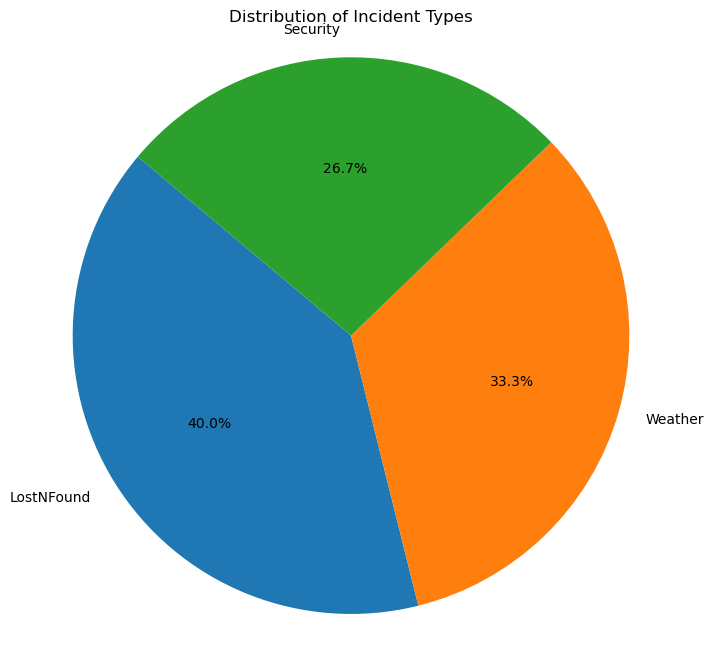

In [23]:
# Pie chart showing distribution of the type of incidents
# There have been significantly more number of LostNFound incidents that have been reported followed by weather

import matplotlib.pyplot as plt

incident_type_counts = incident_df['type'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(incident_type_counts, labels=incident_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Incident Types')
plt.axis ('equal')
plt.show()

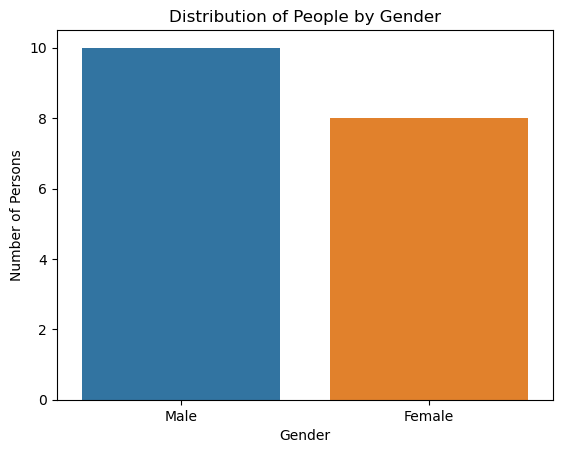

In [27]:
# Bar Graph showing distribution of Gender
# Number of males are more than the number of females

import seaborn as sns

sns.countplot (data=person_df, x='gender')
plt.xlabel ('Gender')
plt.ylabel('Number of Persons')
plt.title('Distribution of People by Gender')
plt.show()

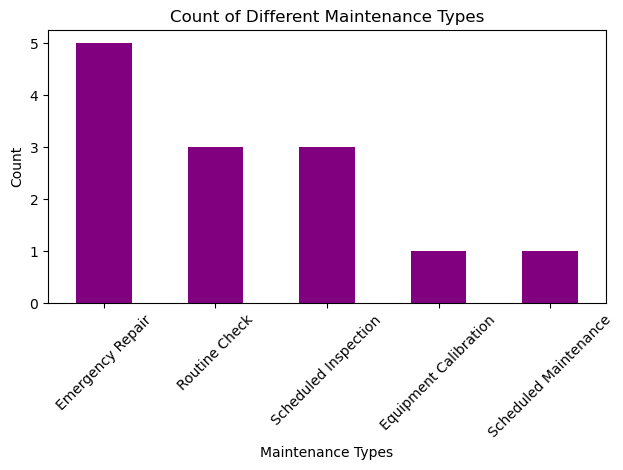

In [28]:
# Bar Chart showing frequency of occurence of different maintenance activities
# Most frequent type of manintence activity at airport is Emergency Repair

maintenance_df['mType'].value_counts().plot(kind='bar', color='purple')
plt.title('Count of Different Maintenance Types')
plt.xlabel ('Maintenance Types')
plt.ylabel ('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()